# **INSTALLING THE REQUIREMENTS**

In [1]:
!pip install tensorflow keras numpy pandas matplotlib seaborn scikit-learn imbalanced-learn -q

# **LOADING THE DATASET**

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **SHAPE OF THE DATASET**

In [3]:
df.shape

(768, 9)

# **DISPLAYS THE FIRST 5 ROWS**

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **DATATYPES AND NON-NULL COUNT**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().values.any()

False

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **ANALYSING THE DATA**

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df['Outcome'].unique()

array([1, 0])

# **DATA VISUALIZATIONS**

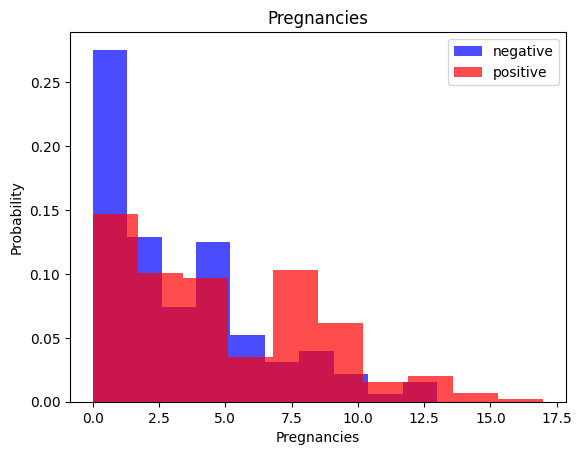

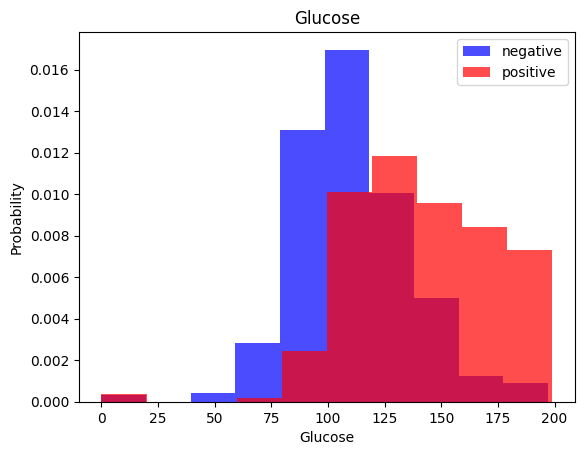

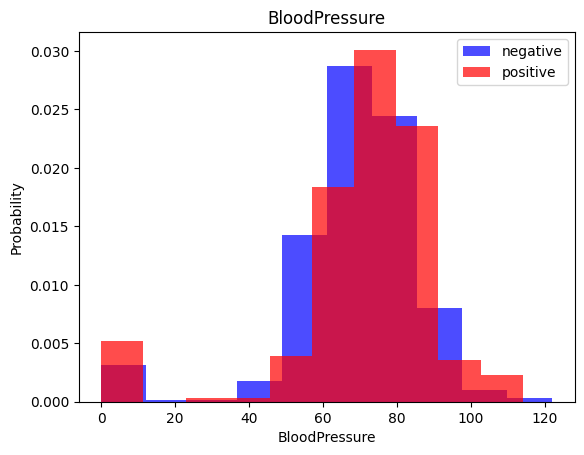

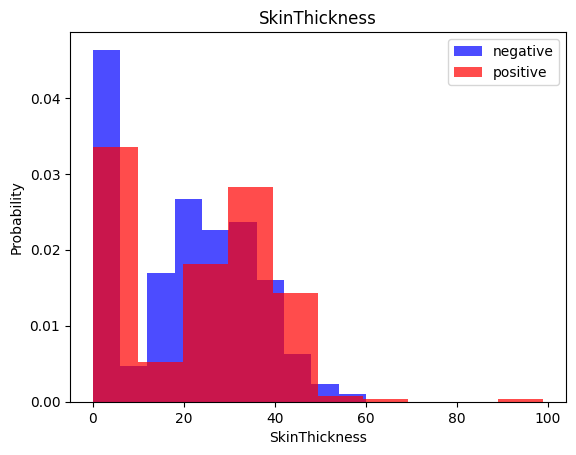

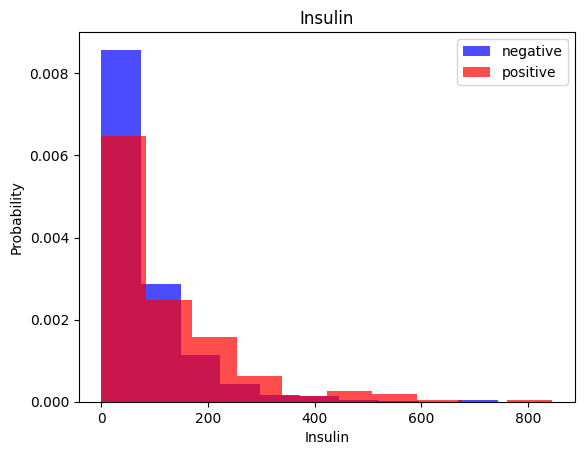

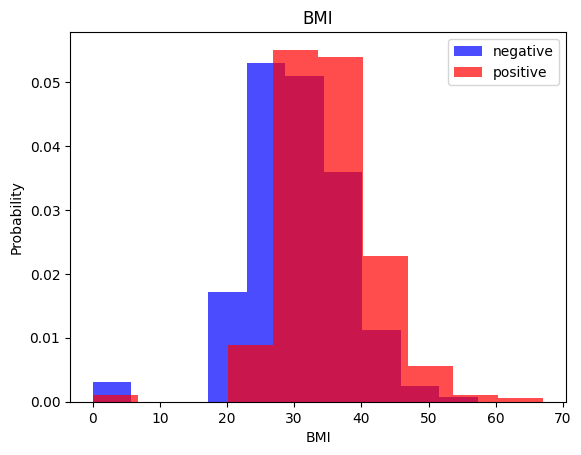

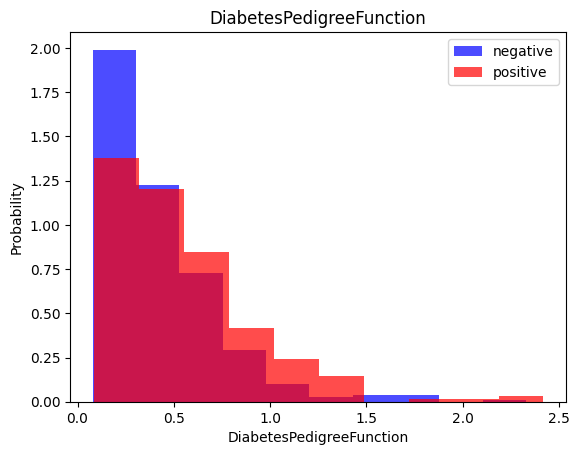

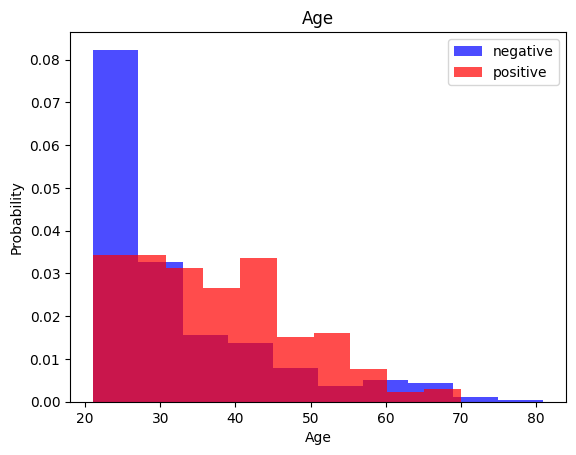

In [11]:
import matplotlib.pyplot as plt
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for label in features:
    plt.hist(df[df['Outcome']==0][label],color='blue',label = 'negative',alpha=0.7,density = True)
    plt.hist(df[df['Outcome']==1][label],color='red',label = 'positive',alpha=0.7,density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

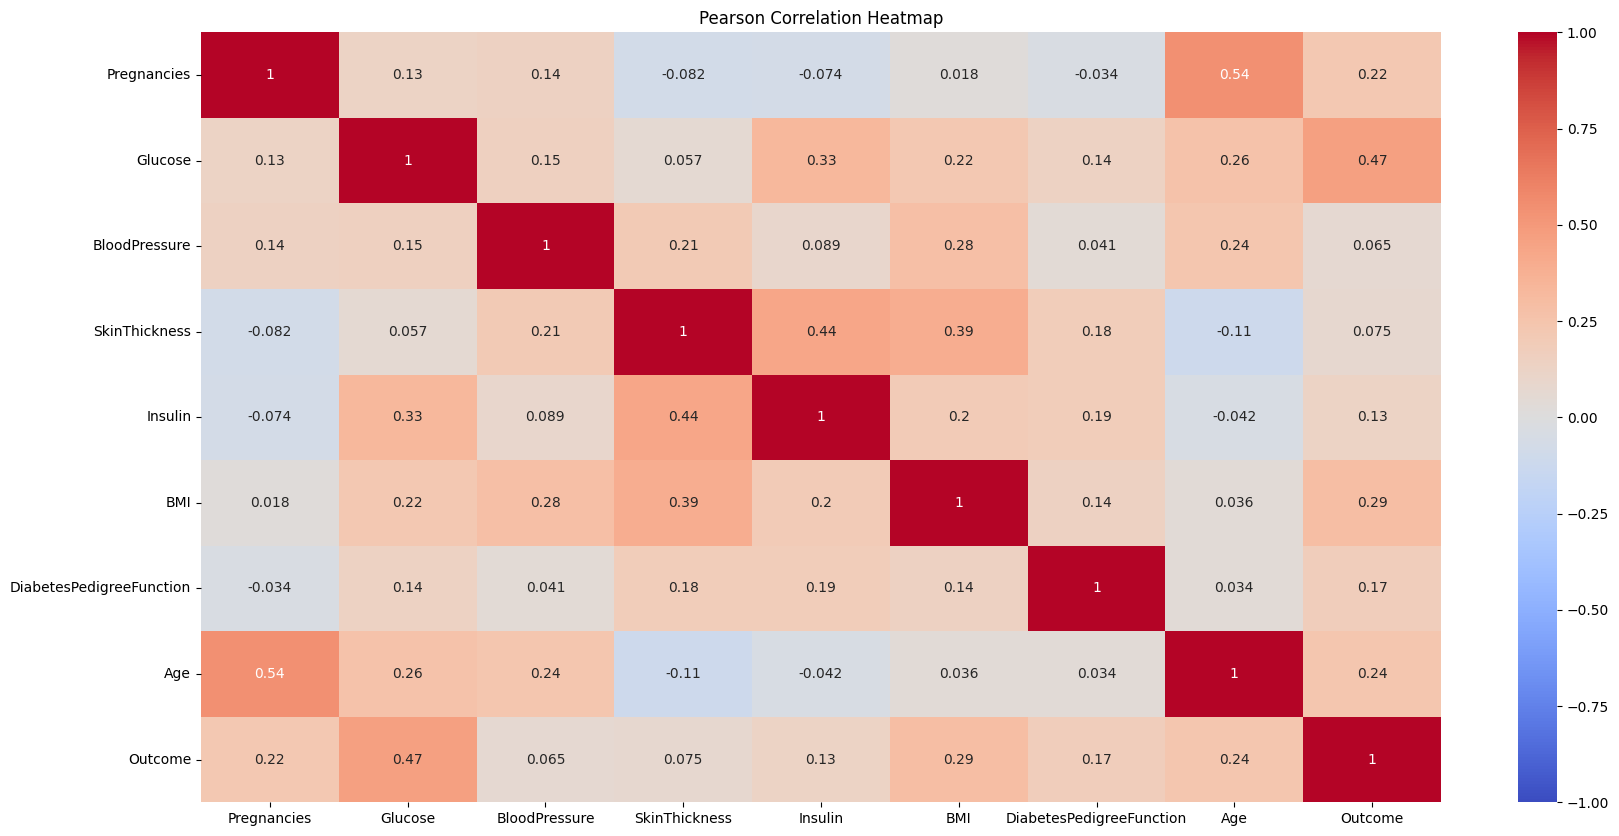

In [12]:
#pearson corelation
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

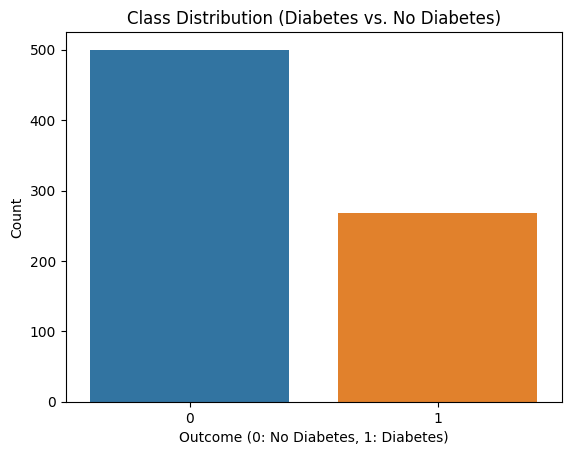

In [13]:
# Visualize the distribution of the target variable
import seaborn as sns

sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution (Diabetes vs. No Diabetes)')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

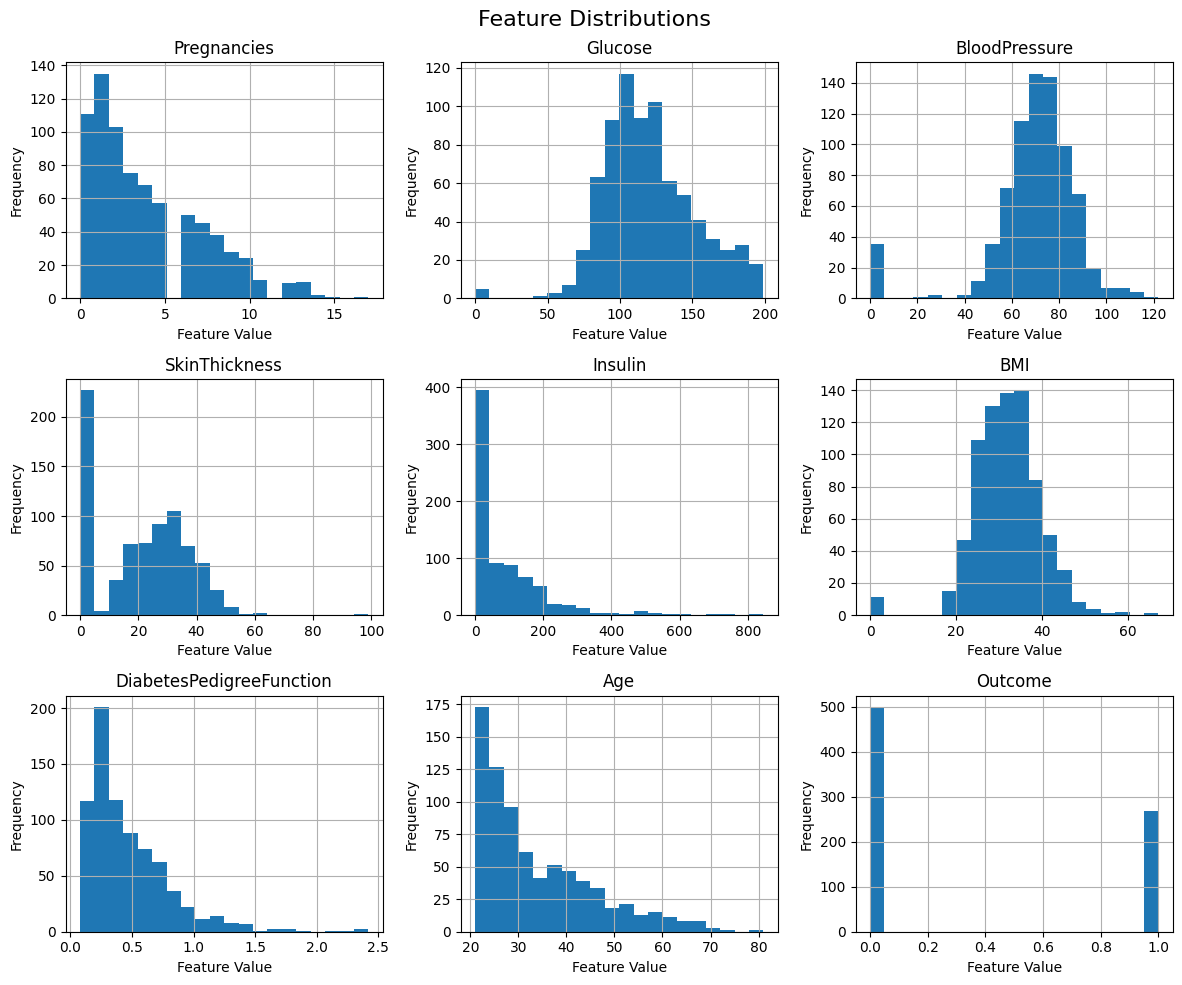

In [14]:
import matplotlib.pyplot as plt

# Create histograms
axes = df.hist(figsize=(12, 10), bins=20)

# Add titles and labels for each subplot
for ax in axes.flatten():
    ax.set_xlabel('Feature Value')
    ax.set_ylabel('Frequency')

plt.suptitle('Feature Distributions', fontsize=16)  # Main title
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

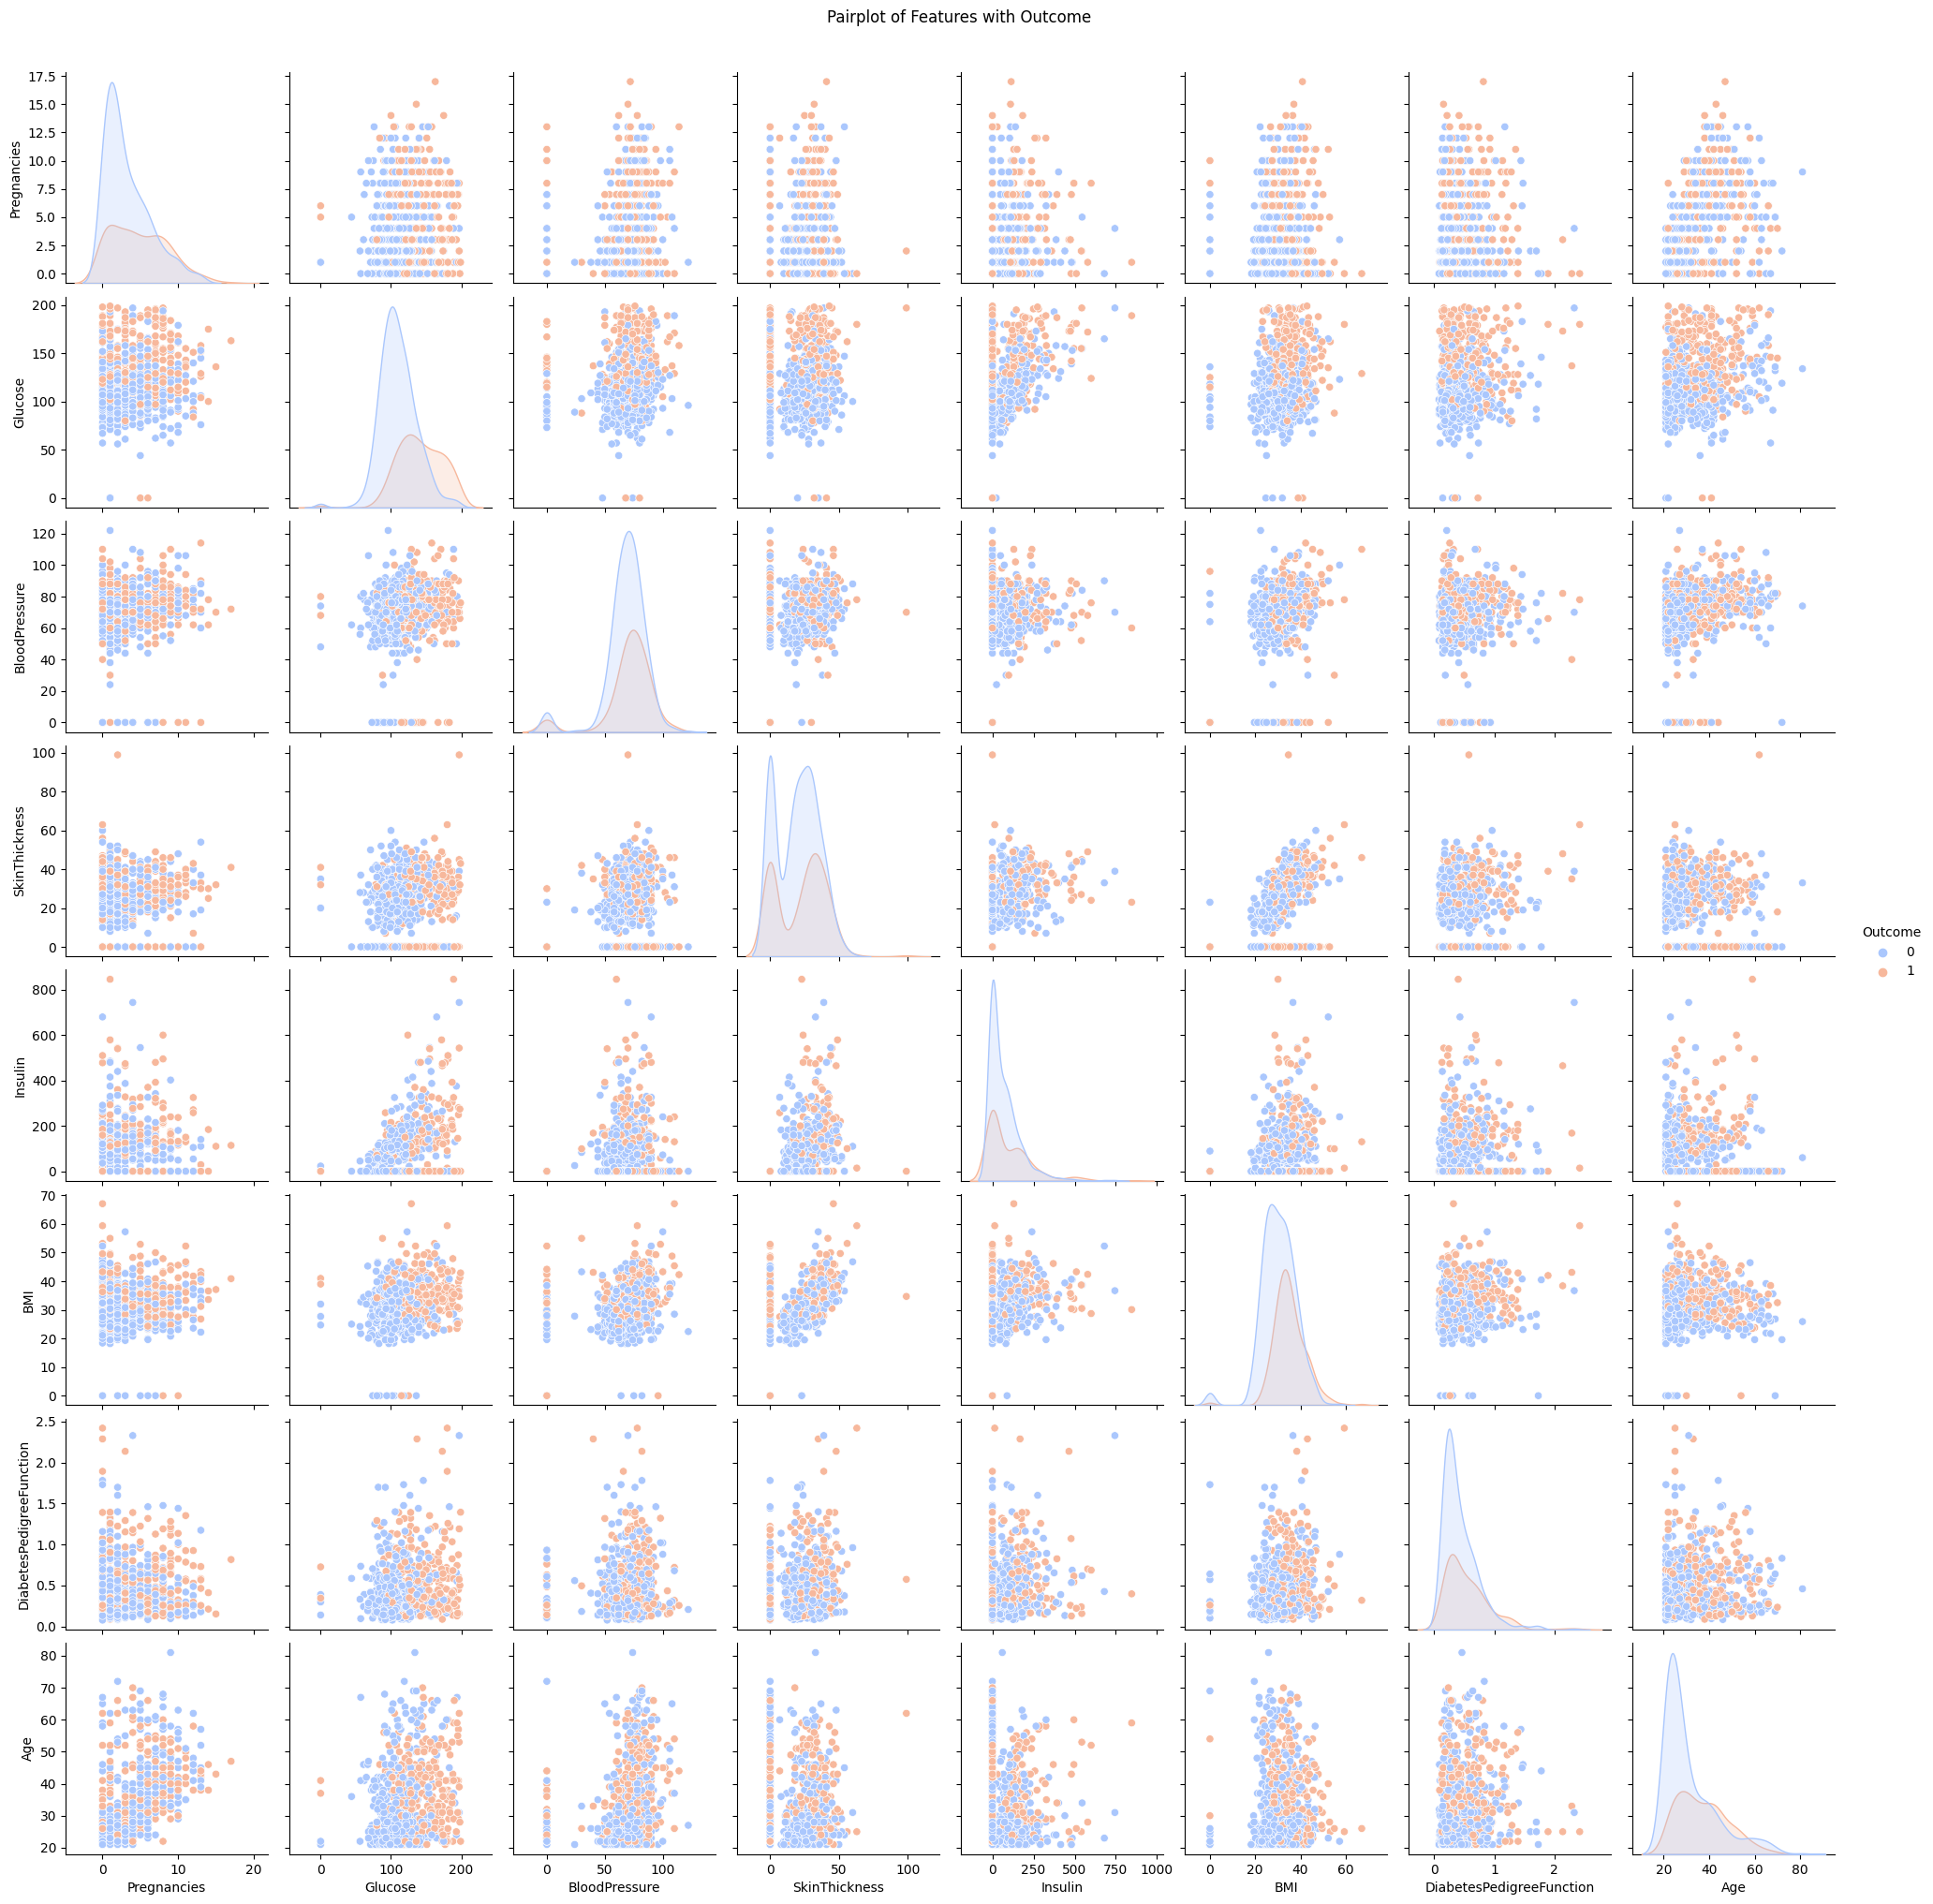

In [15]:
# Pairplot showing the relationship between features, colored by outcome
sns.pairplot(df, hue='Outcome', palette='coolwarm')
plt.suptitle('Pairplot of Features with Outcome', y=1.02)
plt.show()


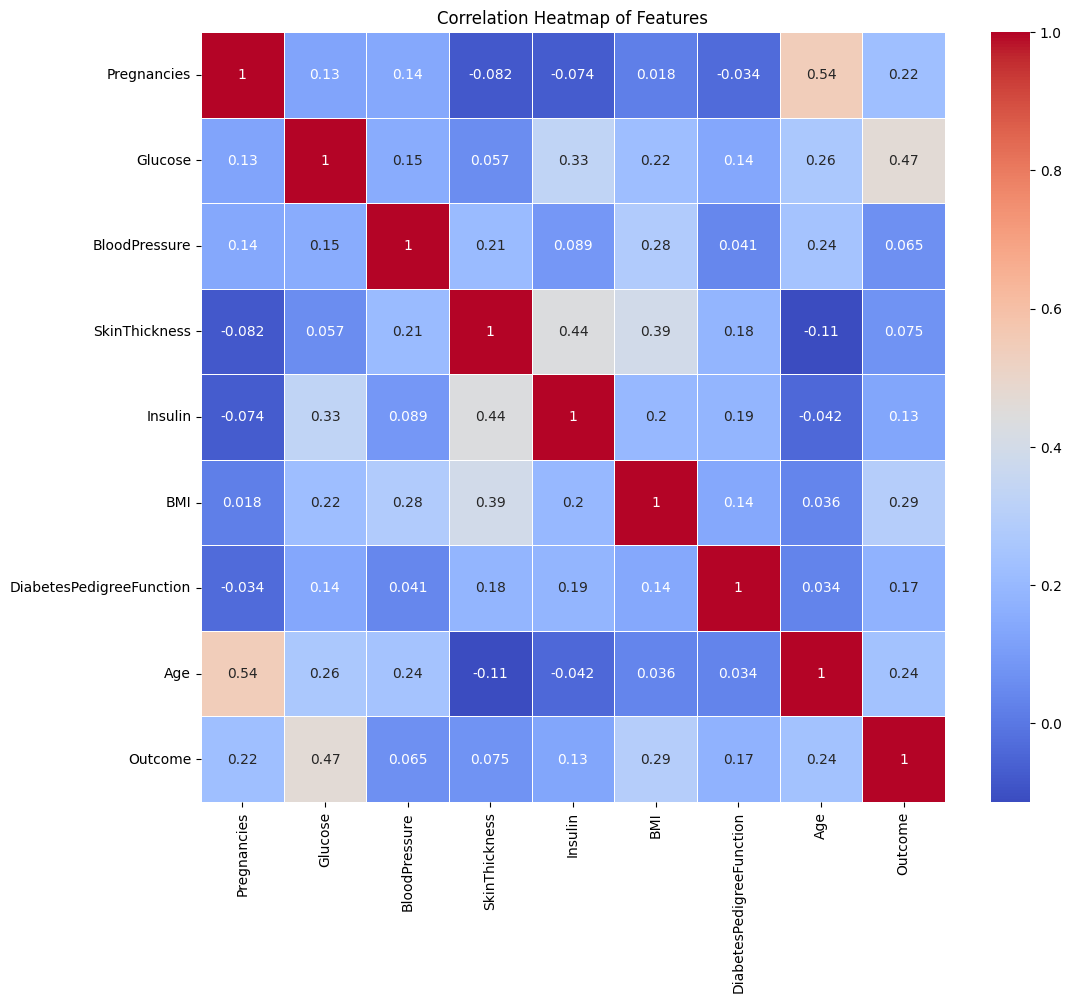

In [16]:
# Correlation heatmap to visualize feature relationships
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# **HANDLING ZERO VALUES**

In [17]:
# Replace zeros with column mean for the specified columns
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    mean_value = df[column][df[column] != 0].mean()
    df[column] = df[column].replace(0, mean_value) 

In [18]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1


# **FEATURE SCALING**

In [19]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **ADDRESSING IMBALANCE**

In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [21]:
import pandas as pd

# Assuming X_scaled is a DataFrame and contains the column names
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# If X_scaled is a NumPy array, use the `features` list for column names
X_resampled_df = pd.DataFrame(X_resampled, columns=features)  # Use predefined column names from `features`
y_resampled_df = pd.Series(y_resampled, name='Outcome')       # Convert y_resampled to Series




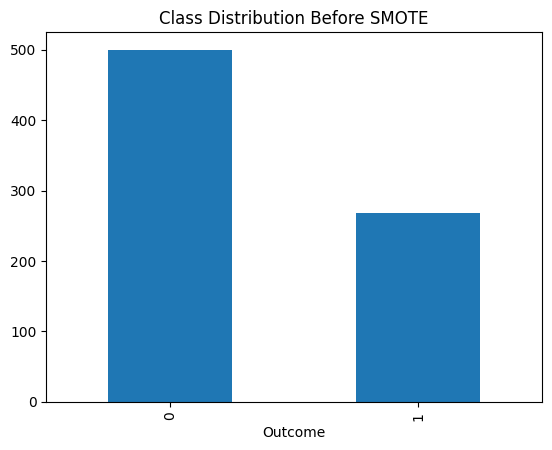

In [22]:
# Visualize class distribution before and after SMOTE
df['Outcome'].value_counts().plot(kind='bar', title='Class Distribution Before SMOTE')
plt.show()

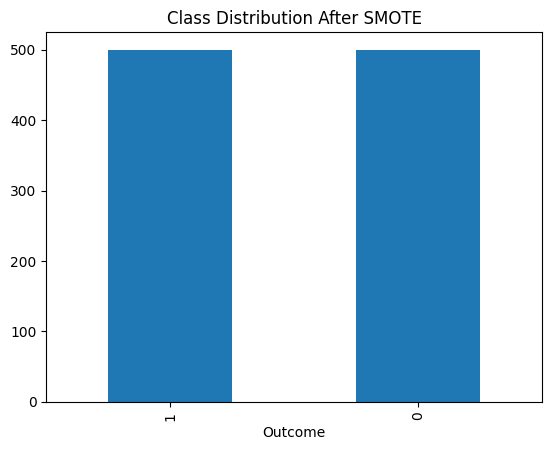

In [23]:
y_resampled_df.value_counts().plot(kind='bar', title='Class Distribution After SMOTE')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [25]:
# Reshape data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Build the CNN model with Dropout and L2 regularization
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))  # Adding Dropout to prevent overfitting
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # L2 regularization
model.add(Dropout(0.3))  # Adding Dropout
model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compile the model with an adjusted learning rate
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Train the model with early stopping for better performance
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [30]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30


I0000 00:00:1734338064.865543     103 service.cc:145] XLA service 0x792c60005230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734338064.865606     103 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/25 ━━━━━━━━━━━━━━━━━━━━ 1:53 5s/step - accuracy: 0.4375 - loss: 1.6806

I0000 00:00:1734338068.535056     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5951 - loss: 1.5528 - val_accuracy: 0.7150 - val_loss: 1.2558
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7180 - loss: 1.1925 - val_accuracy: 0.7300 - val_loss: 1.0052
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.9749 - val_accuracy: 0.7300 - val_loss: 0.8510
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7818 - loss: 0.8161 - val_accuracy: 0.7500 - val_loss: 0.7538
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7693 - loss: 0.7381 - val_accuracy: 0.7700 - val_loss: 0.6898
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7793 - loss: 0.6530 - val_accuracy: 0.7500 - val_loss: 0.6491
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7581 - loss: 0.6228 - val_accuracy: 0.7450 - val_loss: 0.6194
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7308 - loss: 0.6466 - val_accuracy: 0.7500 - val_loss: 0.6033
Ep

In [31]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [32]:
# Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        99
           1       0.72      0.77      0.75       101

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200


Confusion Matrix:
[[69 30]
 [23 78]]


In [34]:
# After training the model, add these lines for testing
import numpy as np
# Sample input data (match the exact features from your original dataset)
sample_data = np.array([
    [6, 148, 72, 35, 0, 33.6, 0.627, 50],  # Diabetic sample
    [1, 85, 66, 29, 0, 26.6, 0.351, 31]    # Non-diabetic sample
])

# Preprocess sample data
scaler = StandardScaler()
sample_scaled = scaler.fit_transform(X)  # Use the same scaler from training
sample_reshaped = sample_scaled.reshape(sample_scaled.shape[0], sample_scaled.shape[1], 1)

# Predict
predictions = model.predict(sample_reshaped)
predicted_classes = (predictions > 0.5).astype(int)

# Print results
for i, (sample, prediction, prob) in enumerate(zip(sample_data, predicted_classes, predictions)):
    print(f"Sample {i+1}:")
    print(f"Input: {sample}")
    print(f"Predicted Class: {'Diabetic' if prediction[0] == 1 else 'Non-Diabetic'}")
    print(f"Probability: {prob[0]:.4f}\n")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Sample 1:
Input: [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
Predicted Class: Diabetic
Probability: 0.7823

Sample 2:
Input: [ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]
Predicted Class: Non-Diabetic
Probability: 0.0612

